## Проектная работа по курсу "Теория вероятностей и математическая статистика"

#### Автор: 
Хусаинов Ильдар

#### Материалы к проекту:
Набор датасетов с сайта IMDB:
* name.basics.tsv;
* title.basics.tsv;
* title.ratings.tsv.

Датасет с сайта Kaggle.com:
* movie_metadata.csv.

#### Тема: 
1. Проверить гипотезу: Научно-фантастические фильмы, снятые до 2000 года, в среднем имеют более высокую оценку, чем научно-фантастические фильмы снятые позже. Рассчитать основные статистические показатели по рейтингу научно-фантастических фильмов: мода, медиана, квартили, дисперсию. 
2. Предсказать: 
    1. прибыль в зависимости от бюджета по научно-фантастическим фильмам;
    2. оценку в зависимости от режиссера.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
actors = pd.read_csv('input/name.basics.tsv', sep='\t')

In [3]:
basics = pd.read_csv('input/title.basics.tsv', sep='\t')

In [4]:
ratings = pd.read_csv('input/title.ratings.tsv', sep='\t')

Проверим датасеты:

In [5]:
actors.loc[actors['primaryName'] == 'Tom Cruise']

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
128,nm0000129,Tom Cruise,1962,\N,"actor,producer,soundtrack","tt0181689,tt0325710,tt0116695,tt0092099"


In [6]:
basics.loc[basics['tconst'].isin(['tt0181689', 'tt0325710', 'tt0116695', 'tt0092099'])]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
90118,tt0092099,movie,Top Gun,Top Gun,0,1986,\N,110,"Action,Drama"
114137,tt0116695,movie,Jerry Maguire,Jerry Maguire,0,1996,\N,139,"Comedy,Drama,Romance"
175487,tt0181689,movie,Minority Report,Minority Report,0,2002,\N,145,"Action,Crime,Mystery"
312425,tt0325710,movie,The Last Samurai,The Last Samurai,0,2003,\N,154,"Action,Drama,War"


In [7]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1503
1,tt0000002,6.3,183
2,tt0000003,6.6,1148
3,tt0000004,6.3,112
4,tt0000005,6.2,1848


## 1 часть. 

### Проверим гипотезу. 

Соединим два датасета - базовый и с рейтингом:

In [8]:
ratings.set_index('tconst').info()

<class 'pandas.core.frame.DataFrame'>
Index: 937541 entries, tt0000001 to tt9916766
Data columns (total 2 columns):
averageRating    937541 non-null float64
numVotes         937541 non-null int64
dtypes: float64(1), int64(1)
memory usage: 21.5+ MB


In [9]:
df = basics.join(ratings.set_index('tconst'), on='tconst', how='left')

In [10]:
df.loc[df['tconst'] == 'tt0181689']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
175487,tt0181689,movie,Minority Report,Minority Report,0,2002,\N,145,"Action,Crime,Mystery",7.6,468591.0


Отфильтруем базу по жанру "Научная-фантастика", ненулевым значениям рейтинга и типу фильмов:

In [11]:
# sf - Sci-Fi
sf = df.loc[(df['genres'].str.contains('sci-fi', case=False, regex=False, na=False)) 
           & (pd.isna(df['averageRating']) != True)
           & (df['startYear'] != '\\N')
           & (df['titleType'].isin(['movie', 'video']))]

In [12]:
sf.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
5761872,tt9648806,movie,Virtual Vendetta,Virtual Vendetta,0,2019,\N,\N,Sci-Fi,7.4,7.0
5778979,tt9684490,video,Dua Lipa: Swan Song,Dua Lipa: Swan Song,0,2019,\N,3,"Music,Sci-Fi,Short",7.6,21.0
5855409,tt9844256,movie,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,0,2018,\N,120,"Action,Animation,Sci-Fi",7.2,20.0
5865528,tt9865446,movie,Siege,Siege,0,2019,\N,16,"Sci-Fi,Thriller",9.1,23.0
5888920,tt9914458,video,Alien Messiah,Alien Messiah,0,2019,\N,75,Sci-Fi,2.6,33.0


Проверим среднюю оценку по жанру "Научная фантастика" до 2000 года и после:

In [13]:
year = 2000

print(f"Средняя оценка до 2000 года: {round(sf.loc[sf['startYear'].astype(int) < year]['averageRating'].mean(), 2)}")
print(f"Средняя оценка после 2000 года: {round(sf.loc[sf['startYear'].astype(int) >= year]['averageRating'].mean(), 2)}")

Средняя оценка до 2000 года: 5.3
Средняя оценка после 2000 года: 5.59


Попробуем ещё отфильтровать только те фильмы, где оценок больше, чем среднее количество оценок:

In [14]:
sf['numVotes'].mean()

14043.273657289003

Посмотрим гистограмму распределения оценок:

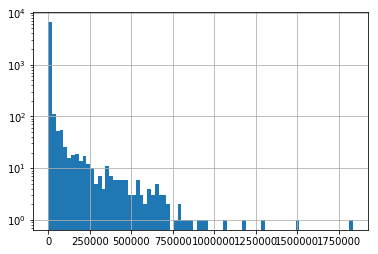

In [15]:
sf['numVotes'].hist(bins=80, log=True);

Чутка отмасштабируем чтобы более четко рассмотреть область в районе среднего числа:

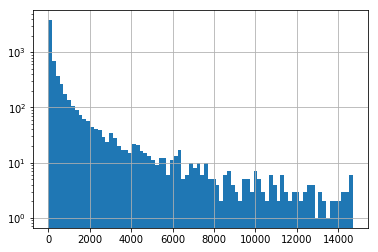

In [16]:
sf.loc[sf['numVotes'] < 15000]['numVotes'].hist(bins=80, log=True);

Очень много фильмов имеют количество оценок меньше среднего, поэтому для более репрезентативного анализа лучше возьмём среднее в ряде, т.е. медиану:

In [17]:
sf['numVotes'].median()

140.0

In [18]:
# проверка гипотезы
def hypothy(year, border):
    before = round(sf.loc[(sf['startYear'].astype(int) < year) 
                        & (sf['numVotes'] > border)]['averageRating'].mean(), 3)
    after = round(sf.loc[(sf['startYear'].astype(int) >= year) 
                       & (sf['numVotes'] > border)]['averageRating'].mean(), 3)

    print(f"Средняя оценка до 2000 года: {before}")
    print(f"Средняя оценка после 2000 года: {after}")

In [19]:
hypothy(2000, 140)

Средняя оценка до 2000 года: 5.197
Средняя оценка после 2000 года: 5.153


На всякий случай проверим по среднему значению:

In [20]:
hypothy(2000, 14043)

Средняя оценка до 2000 года: 6.63
Средняя оценка после 2000 года: 6.354


Интересное наблюдение получается: если считать среднюю оценку по наиболее популярным и известным фильмам, то гипотеза о том, что `научно-фантастические фильмы, снятые до 2000 года, в среднем имеют более высокую оценку, чем научно-фантастические фильмы снятые позже` подтверждается, а если брать датасет с малоизвестными фильмами, то опровергается. 

#### Рассчитаем основные статистические показатели по рейтингу Sci-Fi фильмов:

Мода:

In [21]:
sf['averageRating'].mode()

0    5.8
dtype: float64

Среднее арифметическое:

In [22]:
sf['averageRating'].mean()

5.467632850241546

Медиана:

In [23]:
sf['averageRating'].median()

5.6

Несмещенная дисперсия:

In [24]:
sf['averageRating'].var(ddof=1)

2.2794467476602502

Среднеквадратичное отклонение (выборочное)

In [25]:
sf['averageRating'].std(ddof=1)

1.5097836757828091

Построим боксплот, чтобы посмотреть распределение по квантилям:

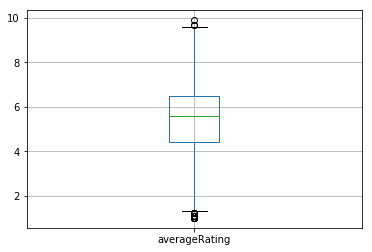

In [26]:
sf[['averageRating']].boxplot();

Построим гистограмму:

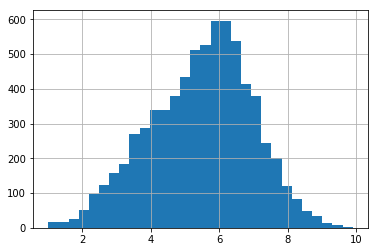

In [27]:
sf['averageRating'].hist(bins=30);

Рейтинг ожидаемо имеет нормальное распределение.

Построим средний рейтинг по каждому году производства фильмов:

In [28]:
# moy - mean of the year
moy = sf.loc[sf['numVotes'] > 140].groupby('startYear')[['averageRating']].mean()
moy.head()

,averageRating
startYear,
1916,6.7
1918,6.8
1920,7.0
1921,6.0
1925,7.1


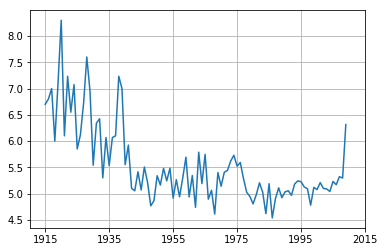

In [29]:
plt.plot(moy.reset_index()['startYear'], moy['averageRating'])
plt.xticks(ticks=[i for i in range(0, 120, 20)], labels=[i for i in range(1915, 2040, 20)])
plt.grid(True)
plt.show()

На графике виден тренд снижения средней оценки.

## 2 часть. 

### Предскажем: 
1. Прибыль в зависимости от бюджета;
2. Оценку фильма в зависимости от режиссера

In [30]:
data = pd.read_csv('input/movie_metadata.csv')

In [31]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [32]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Для начала посмотрим зависимость по фильмам Джеймса Кемерона:

In [33]:
JC = data.loc[data['director_name'] == 'James Cameron'][['movie_title', 'country', 'director_name', 'actor_1_name', 
                                                    'budget', 'gross', 'genres','title_year',
                                                    'num_voted_users', 'imdb_score', 'content_rating']]
JC

,movie_title,country,director_name,actor_1_name,budget,gross,genres,title_year,num_voted_users,imdb_score,content_rating
0,Avatar,USA,James Cameron,CCH Pounder,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,2009.0,886204,7.9,PG-13
26,Titanic,USA,James Cameron,Leonardo DiCaprio,200000000.0,658672302.0,Drama|Romance,1997.0,793059,7.7,PG-13
288,Terminator 2: Judgment Day,USA,James Cameron,Joe Morton,102000000.0,204843350.0,Action|Sci-Fi,1991.0,744891,8.5,R
291,True Lies,USA,James Cameron,Jamie Lee Curtis,115000000.0,146282411.0,Action|Comedy|Thriller,1994.0,190439,7.2,R
606,The Abyss,USA,James Cameron,Michael Biehn,69500000.0,54222000.0,Adventure|Drama|Sci-Fi|Thriller,1989.0,131217,7.6,PG-13
2486,Aliens,USA,James Cameron,Michael Biehn,18500000.0,85200000.0,Action|Adventure|Sci-Fi,1986.0,488537,8.4,R
3575,The Terminator,UK,James Cameron,Michael Biehn,6500000.0,38400000.0,Action|Sci-Fi,1984.0,600266,8.1,R


In [34]:
x1 = JC['budget']
x1

0       237000000.0
26      200000000.0
288     102000000.0
291     115000000.0
606      69500000.0
2486     18500000.0
3575      6500000.0
Name: budget, dtype: float64

In [35]:
y1 = JC['gross']
y1

0       760505847.0
26      658672302.0
288     204843350.0
291     146282411.0
606      54222000.0
2486     85200000.0
3575     38400000.0
Name: gross, dtype: float64

Построим диаграмму распределения:

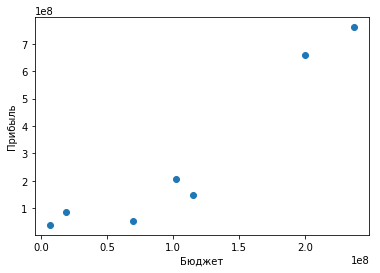

In [36]:
plt.scatter(x1, y1)
plt.xlabel('Бюджет')
plt.ylabel('Прибыль');

Прослеживается явная зависимость. Найдем коэффициенты линейной регрессии с помощью формул для парной регрессии:

$$y = b_0 + b_1 x_1,$$где


$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

In [37]:
# Получение коэффициентов парной регрессии
def reg_pair_coef(x, y):
    b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
    b0 = np.mean(y) - b1 * np.mean(x)

    return b0, b1

In [38]:
b0, b1 = reg_pair_coef(x1, y1)
b0, b1

(-71117119.68889135, 3.267796590276873)

Построим диаграмму распределения вместе с линейной регрессией:

In [39]:
# Функция вывода диаграммы распределения и линейной регрессии
def scatter_reg(x, y, b0, b1, x_label='Бюджет', y_label='Прибыль'):
    ox = x
    oy = b0 + b1 * ox
    
    plt.figure(figsize=(6,4))
    plt.scatter(x, y)
    plt.plot(ox, oy, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

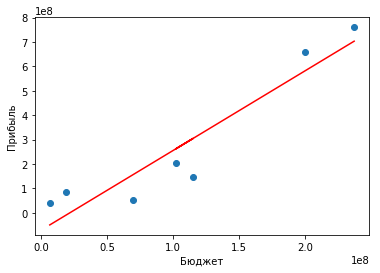

In [40]:
scatter_reg(x1, y1, b0, b1)

Предскажем значения с полученными коэффициентами и посчитаем коэффициент детерминации:

$$R^2 = \dfrac{D_{model}}{D_y}.$$

In [41]:
z1 = b0 + b1 * x1           
R2 = z1.var() / y1.var()
print(f'b0 = {b0}')
print(f'b1 = {b1}')
print(f'R2 = {R2}')

b0 = -71117119.68889135
b1 = 3.267796590276873
R2 = 0.8811239026827489


Очень неплохой коэффициент получился. 

Напишем функцию, которая выводит линейную регрессию, предсказывает значения и считает коэффициент детерминации:

In [42]:
def deter(x, y, x_label='Бюджет', y_label='Прибыль'):
    b0, b1 = reg_pair_coef(x, y)
    z = b0 + b1 * x
    
    scatter_reg(x, y, b0, b1, x_label, y_label)    
        
    R2 = z.var() / y.var()
    print(f'b0 = {b0}')
    print(f'b1 = {b1}')
    print(f'R2 = {R2}')

Почистим данные и возьмем выборку научно-фантастических фильмов. 

In [43]:
sf = data[['movie_title', 'country', 'director_name', 'actor_1_name', 
    'budget', 'gross', 'genres','title_year', 'num_voted_users', 
    'imdb_score']].dropna().loc[(data['genres'].str.contains('Sci-Fi', case=False, regex=False, na=False))]
sf.head()

,movie_title,country,director_name,actor_1_name,budget,gross,genres,title_year,num_voted_users,imdb_score
0,Avatar,USA,James Cameron,CCH Pounder,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,2009.0,886204,7.9
5,John Carter,USA,Andrew Stanton,Daryl Sabara,263700000.0,73058679.0,Action|Adventure|Sci-Fi,2012.0,212204,6.6
8,Avengers: Age of Ultron,USA,Joss Whedon,Chris Hemsworth,250000000.0,458991599.0,Action|Adventure|Sci-Fi,2015.0,462669,7.5
10,Batman v Superman: Dawn of Justice,USA,Zack Snyder,Henry Cavill,250000000.0,330249062.0,Action|Adventure|Sci-Fi,2016.0,371639,6.9
11,Superman Returns,USA,Bryan Singer,Kevin Spacey,209000000.0,200069408.0,Action|Adventure|Sci-Fi,2006.0,240396,6.1


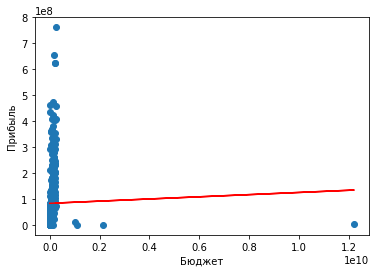

b0 = 83116857.90843247
b1 = 0.004175701589578362
R2 = 0.000480564392866803


In [44]:
deter(sf['budget'], sf['gross'])

Посмотрим самые бюджетные фильмы:

In [45]:
sf.sort_values(by='budget', ascending=False).head(6)

,movie_title,country,director_name,actor_1_name,budget,gross,genres,title_year,num_voted_users,imdb_score
2988,The Host,South Korea,Joon-ho Bong,Doona Bae,1.221550e+10,2201412.0,Comedy|Drama|Horror|Sci-Fi,2006.0,68883,7.0
2334,Steamboy,Japan,Katsuhiro Ôtomo,William Hootkins,2.127520e+09,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,2004.0,13727,6.9
3423,Akira,Japan,Katsuhiro Ôtomo,Mitsuo Iwata,1.100000e+09,439162.0,Action|Animation|Sci-Fi,1988.0,106160,8.1
4542,Godzilla 2000,Japan,Takao Okawara,Hiroshi Abe,1.000000e+09,10037390.0,Action|Adventure|Drama|Sci-Fi|Thriller,1999.0,5442,6.0
5,John Carter,USA,Andrew Stanton,Daryl Sabara,2.637000e+08,73058679.0,Action|Adventure|Sci-Fi,2012.0,212204,6.6
8,Avengers: Age of Ultron,USA,Joss Whedon,Chris Hemsworth,2.500000e+08,458991599.0,Action|Adventure|Sci-Fi,2015.0,462669,7.5


Первые четыре явные выбросы. Исключим их из выборки.

In [46]:
ids = sf.sort_values(by='budget', ascending=False).index.values[:4]
ids

array([2988, 2334, 3423, 4542])

In [47]:
sf = sf.loc[~sf.index.isin(ids)]

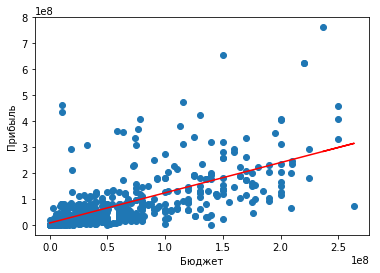

b0 = 7521186.890314326
b1 = 1.1619431570981502
R2 = 0.4071417415155534


In [48]:
deter(sf['budget'], sf['gross'])

Уже не плохо, но линейная регрессия в любом случае не самый лучший выбор для предсказания такой *явно сложной* зависимости.

Попробуем исключить самые профитные фильмы:

In [49]:
ids = (sf['gross'] / sf['budget']).sort_values(ascending=False).index.values[:10]
ids

array([5033, 3024, 3080, 4728, 4893, 4058, 4538, 2051, 4926, 2363])

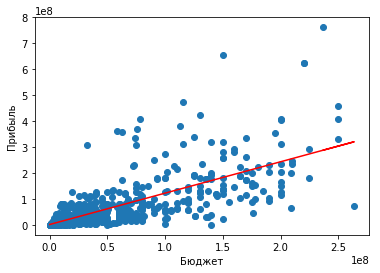

b0 = 1750771.3262518942
b1 = 1.2064390127518583
R2 = 0.4583113305634412


In [50]:
deter(sf.loc[~sf.index.isin(ids)]['budget'], sf.loc[~sf.index.isin(ids)]['gross'])

Уже лучше, но корреляция не явная поэтому и такой результат.

#### Теперь предскажем оценку в зависимости от режиссера:

In [51]:
# dtr - director (режиссер)
dtr = data[['movie_title', 'director_name', 'genres', 'actor_1_name', 'title_year', 'num_voted_users',   
    'imdb_score']].dropna().loc[(~data['genres'].str.contains('Docum', case=False, regex=False, na=False))]

dtr.head()

,movie_title,director_name,genres,actor_1_name,title_year,num_voted_users,imdb_score
0,Avatar,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,2009.0,886204,7.9
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,2007.0,471220,7.1
2,Spectre,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,2015.0,275868,6.8
3,The Dark Knight Rises,Christopher Nolan,Action|Thriller,Tom Hardy,2012.0,1144337,8.5
5,John Carter,Andrew Stanton,Action|Adventure|Sci-Fi,Daryl Sabara,2012.0,212204,6.6


In [52]:
dtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4816 entries, 0 to 5041
Data columns (total 7 columns):
movie_title        4816 non-null object
director_name      4816 non-null object
genres             4816 non-null object
actor_1_name       4816 non-null object
title_year         4816 non-null float64
num_voted_users    4816 non-null int64
imdb_score         4816 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 301.0+ KB


Посчитаем количество снятых каждым режиссером фильмов:

In [53]:
cnt = dtr.groupby(by='director_name')[['director_name']].count().rename(columns={'director_name': 'cnt'})

cnt.tail()

,cnt
director_name,
Zoran Lisinac,1
Álex de la Iglesia,1
Émile Gaudreault,1
Éric Tessier,1
Étienne Faure,1


Посмотрим гистограмму по количеству фильмов снятыми режиссерами:

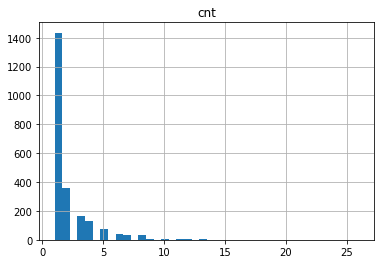

In [54]:
cnt.hist(bins=40);

Соединим с основной выборкой и исключим тех режиссеров, которые снимали меньше трех фильмов (таких почти две тысячи):

In [55]:
spam = dtr.merge(cnt, on='director_name', how='left')

spam.head()

,movie_title,director_name,genres,actor_1_name,title_year,num_voted_users,imdb_score,cnt
0,Avatar,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,2009.0,886204,7.9,7
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,2007.0,471220,7.1,7
2,Spectre,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,2015.0,275868,6.8,8
3,The Dark Knight Rises,Christopher Nolan,Action|Thriller,Tom Hardy,2012.0,1144337,8.5,8
4,John Carter,Andrew Stanton,Action|Adventure|Sci-Fi,Daryl Sabara,2012.0,212204,6.6,3


In [56]:
spam = spam.loc[spam['cnt'] > 2]

Сгруппируем по режиссерам и выведем средний рейтинг:

In [57]:
eggs = spam.groupby(by='director_name')[['imdb_score']].mean().rename(columns={"imdb_score": "dtr_score"})

eggs.head()

,dtr_score
director_name,
Adam McKay,6.916667
Adam Shankman,5.962500
Adrian Lyne,6.400000
Akiva Schaffer,6.033333
Alan Parker,7.033333


Построим *Топ-15*:

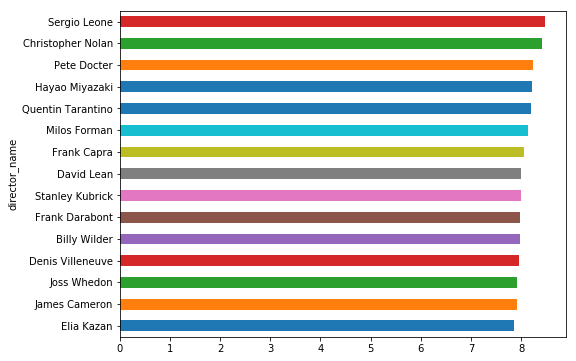

In [58]:
eggs.sort_values('dtr_score', ascending=False).head(15)['dtr_score'].sort_values().plot('barh', figsize=(8,6));

Соединим с основным и предскажем:

In [59]:
spam = spam.merge(eggs, on='director_name', how='left')

spam.head()

,movie_title,director_name,genres,actor_1_name,title_year,num_voted_users,imdb_score,cnt,dtr_score
0,Avatar,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,2009.0,886204,7.9,7,7.914286
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,2007.0,471220,7.1,7,6.985714
2,Spectre,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,2015.0,275868,6.8,8,7.500000
3,The Dark Knight Rises,Christopher Nolan,Action|Thriller,Tom Hardy,2012.0,1144337,8.5,8,8.425000
4,John Carter,Andrew Stanton,Action|Adventure|Sci-Fi,Daryl Sabara,2012.0,212204,6.6,3,7.733333


Посмотрим на размер получившейся выборки:

In [60]:
spam.movie_title.index.shape[0]

2661

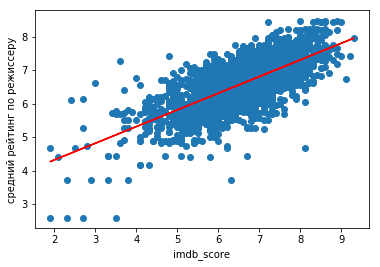

b0 = 3.323454454654715
b1 = 0.49819492369204016
R2 = 0.49819492369215324


In [61]:
deter(spam['imdb_score'], spam['dtr_score'], x_label='imdb_score', y_label='средний рейтинг по режиссеру')

Зависимость есть, но тоже не самая явная.

Напишем функцию, которая делает все предыдущие шаги и передадим ей актеров:

In [62]:
# homo sapiens score
def homo_score(df_source, homo='director_name', year=1890):
    # убираем документальные фильмы и наблюдения с пропущенными значениями
    df = df_source[['movie_title', homo, 'genres', 'title_year',  
        'imdb_score']].dropna().loc[(~df_source['genres'].str.contains('Docum', case=False, regex=False, na=False)) 
                                    & (df_source['title_year'] > year)]
    
    # считаем количество фильмов в которых участвовал человек и убираем те, где меньше двух
    cnt = df.groupby(by=homo)[[homo]].count().rename(columns={homo: 'cnt'})
    spam = df.merge(cnt, on=homo, how='left')    
    spam = spam.loc[spam['cnt'] > 2]

    # считаем средний рейтинг по человеку и выводим Топ-15
    eggs = spam.groupby(by=homo)[['imdb_score']].mean().rename(columns={'imdb_score': 'mean_score'})    
    eggs.sort_values('mean_score', ascending=False).head(10)['mean_score'].sort_values().plot('barh', figsize=(8,4))
    
    # соединяем с основной выборкой 
    spam = spam.merge(eggs, on=homo, how='left')
    
    # выводим 

    deter(spam['imdb_score'], spam['mean_score'], x_label='imdb_score', y_label='средний рейтинг по человеку')

Актер первого плана:

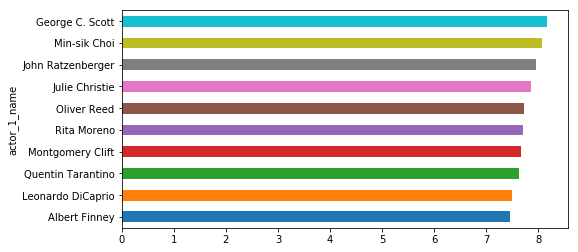

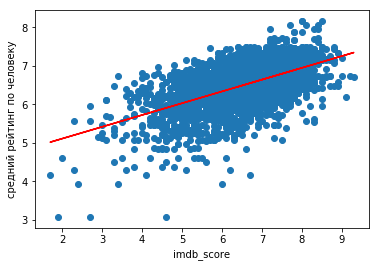

b0 = 4.500013757164682
b1 = 0.30597743080935114
R2 = 0.3059774308093517


In [63]:
homo_score(data, homo='actor_1_name')

Посмотрим более свежие фильмы:

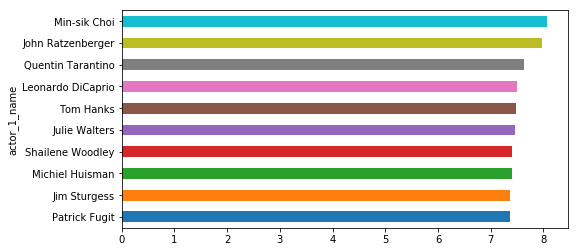

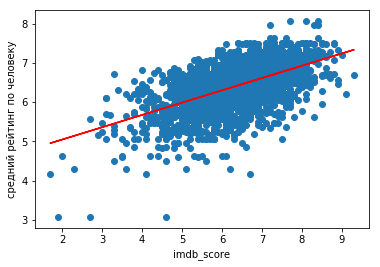

b0 = 4.422917222837283
b1 = 0.3128192068018889
R2 = 0.31281920680180575


In [64]:
homo_score(data, homo='actor_1_name', year=1990)

Актер второго плана:

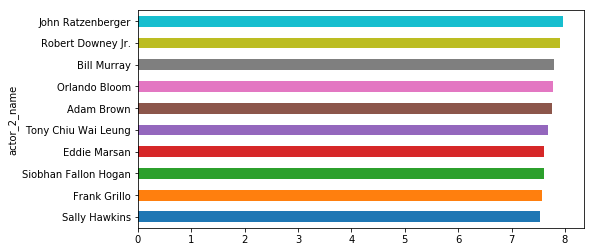

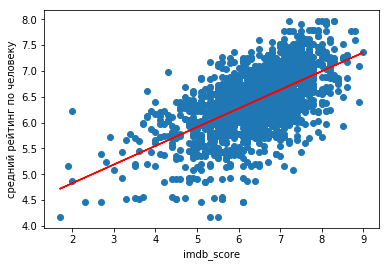

b0 = 4.10360456596583
b1 = 0.3616897981086239
R2 = 0.3616897981086766


In [65]:
homo_score(data, homo='actor_2_name', year=1990)

Актер третьего плана:

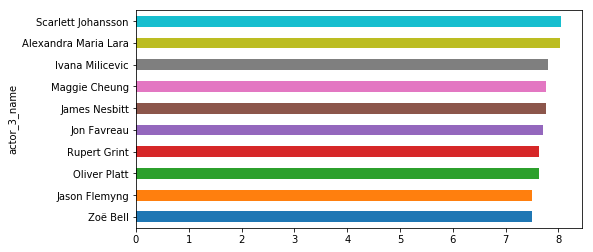

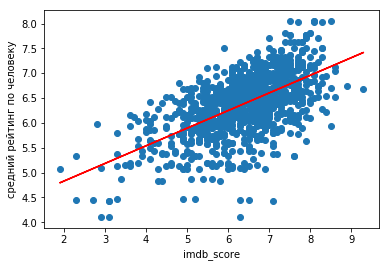

b0 = 4.120581869325816
b1 = 0.35443216060823013
R2 = 0.35443216060826815


In [66]:
homo_score(data, homo='actor_3_name', year=1990)

#### Вывод: 
По режиссерам корреляция больше, чем по актерам.